In [1]:
import msprime
import numpy as np
import statistics
import math
import allel
import pandas as pd
import statsmodels.api as sm
from scipy import (stats,ndimage)

In [2]:
import matplotlib.pyplot as plt

In [3]:
m=0.04
tmove=1000

In [41]:
population_configurations=[msprime.PopulationConfiguration(sample_size = 200),
                          msprime.PopulationConfiguration(sample_size = 200),
                          msprime.PopulationConfiguration(sample_size = 0)]

mig_mat = np.array([
    [      0, m],
    [m,       0]
])


In [42]:
mig_mat = np.append(mig_mat, np.zeros((1,2)), axis = 0)

In [44]:
mig_mat = np.append(mig_mat, np.zeros((3,1)), axis = 1)

In [45]:
mig_mat

array([[0.  , 0.04, 0.  ],
       [0.04, 0.  , 0.  ],
       [0.  , 0.  , 0.  ]])

In [47]:
population_configurations.append(msprime.PopulationConfiguration(sample_size = 0))

In [49]:
population_configurations

In [40]:
np.append(mig_mat, np.array([0,0,0]),axis = 1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
demog=[msprime.MassMigration(
        time=tmove,
        source=0,
        destination=2,
        proportion=1.0),
       msprime.MassMigration(
        time=tmove,
        source=1,
        destination=2,
        proportion=1.0),
      msprime.MigrationRateChange(
          time=tmove,
          rate=0)]

ts=msprime.simulate(Ne=1e4,
                      population_configurations=population_configurations,
                      migration_matrix=mig_mat,
                      mutation_rate=1e-08,
                      recombination_rate=1e-08,
                      length=1e6,
                   demographic_events=demog)

In [9]:
ts.num_sites

3207

In [155]:
fstmat=np.zeros(100)
for j, tree_seq in enumerate(ts):
    af=np.zeros(tree_seq.num_sites)
    for i, variant in enumerate(tree_seq.variants()):
        af[i]=np.mean(variant.genotypes)
    
    snp_ix=np.where(af>0.01)[0]
    if(snp_ix.size>0):
        fst=tree_seq.Fst(sample_sets=[ [0,1],[2,3] ],windows="sites")
        fstmat[j]=np.nanmean(fst[snp_ix])

In [156]:
np.nanmean(fst[snp_ix])

0.038328153853082914

(array([ 5.,  7., 19., 20., 23., 14.,  6.,  3.,  1.,  2.]),
 array([-0.01357919, -0.00309338,  0.00739242,  0.01787822,  0.02836403,
         0.03884983,  0.04933563,  0.05982144,  0.07030724,  0.08079305,
         0.09127885]),
 <a list of 10 Patch objects>)

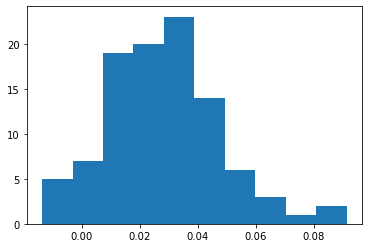

In [157]:
plt.hist(fstmat)